<a href="https://colab.research.google.com/github/PraeJi/Deep-Learning-for-Image/blob/main/Image_classification(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision,Image Classification | Create Model and Train

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Step Data pipeline

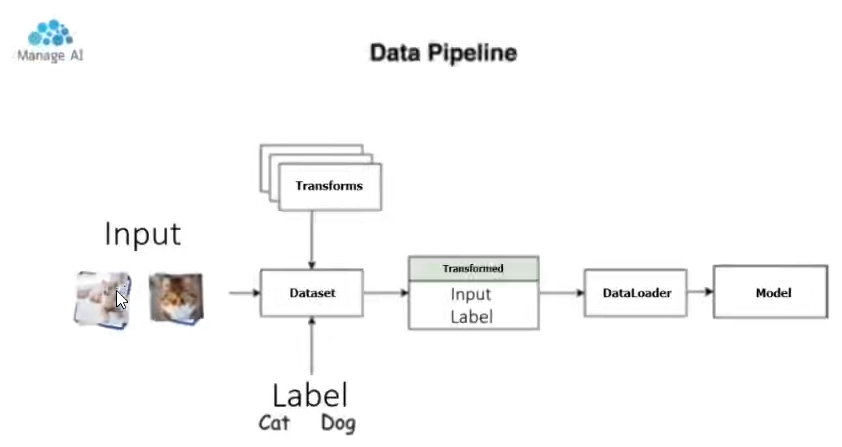

### Download Data

In [2]:
!git clone https://git-ai.inet-th.net/suphanat.bo/kong_dataset_dogcat.git

Cloning into 'kong_dataset_dogcat'...
remote: Enumerating objects: 11362, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 11362 (delta 13), reused 9 (delta 9), pack-reused 11341 (from 1)
Receiving objects: 100% (11362/11362), 265.99 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (3813/3813), done.
Updating files: 100% (11077/11077), done.


In [3]:
!pwd

/content


In [4]:
%cd kong_dataset_dogcat

/content/kong_dataset_dogcat


In [5]:
!ls

16E2CB2CC41B4CB980FC4480DC146122_1000.jpg  data.csv		 images    set_pytorch
annotations				   dogecoin-og-logo.png  position


In [6]:
import torch

In [7]:
device = ("cuda" if torch.cuda.is_available() else 'cpu')
device

'cpu'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
!pwd

/content/kong_dataset_dogcat


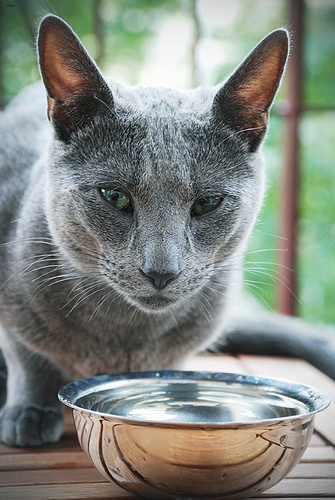

In [10]:
im = Image.open('/content/kong_dataset_dogcat/images/Cats_Test1000.jpg')
im

In [11]:
print(im.size)

(335, 500)


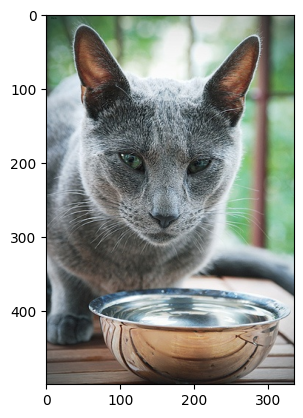

In [12]:
plt.imshow(im)

In [13]:
df = pd.read_csv("/content/kong_dataset_dogcat/data.csv")
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


filename  width  height  xmin  ymin  xmax  ymax label
0     Cats_Test3387.jpg    500     375   179    69   315   199   dog
1     Cats_Test3261.jpg    334     500   109    17   263   162   dog
2     Cats_Test1566.jpg    375     500   108   197   256   359   dog
3     Cats_Test2617.jpg    500     335   148     1   373   215   cat
4     Cats_Test3281.jpg    375     500     1    96   341   446   dog
...                 ...    ...     ...   ...   ...   ...   ...   ...
3681  Cats_Test1683.jpg    500     375   227    24   359   156   cat
3682  Cats_Test3256.jpg    500     333   213    53   311   162   dog
3683  Cats_Test1778.jpg    333     500    36    74   166   211   cat
3684   Cats_Test932.jpg    479     500    33    44   415   396   dog
3685   Cats_Test323.jpg    500     391    75    26   215   167   dog

[3686 rows x 8 columns]

In [14]:
df.head()

filename  width  height  xmin  ymin  xmax  ymax label
0  Cats_Test3387.jpg    500     375   179    69   315   199   dog
1  Cats_Test3261.jpg    334     500   109    17   263   162   dog
2  Cats_Test1566.jpg    375     500   108   197   256   359   dog
3  Cats_Test2617.jpg    500     335   148     1   373   215   cat
4  Cats_Test3281.jpg    375     500     1    96   341   446   dog

In [15]:
df.tail(5)

filename  width  height  xmin  ymin  xmax  ymax label
3681  Cats_Test1683.jpg    500     375   227    24   359   156   cat
3682  Cats_Test3256.jpg    500     333   213    53   311   162   dog
3683  Cats_Test1778.jpg    333     500    36    74   166   211   cat
3684   Cats_Test932.jpg    479     500    33    44   415   396   dog
3685   Cats_Test323.jpg    500     391    75    26   215   167   dog

In [16]:
df.shape

(3686, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3686 non-null   object
 1   width     3686 non-null   int64 
 2   height    3686 non-null   int64 
 3   xmin      3686 non-null   int64 
 4   ymin      3686 non-null   int64 
 5   xmax      3686 non-null   int64 
 6   ymax      3686 non-null   int64 
 7   label     3686 non-null   object
dtypes: int64(6), object(2)
memory usage: 230.5+ KB


In [18]:
df["filename"].head()

0    Cats_Test3387.jpg
1    Cats_Test3261.jpg
2    Cats_Test1566.jpg
3    Cats_Test2617.jpg
4    Cats_Test3281.jpg
Name: filename, dtype: object

In [19]:
df.columns

Index(['filename', 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax', 'label'], dtype='object')

In [20]:
df['label'].value_counts()

label
dog    2498
cat    1188
Name: count, dtype: int64

In [21]:
df['filename'][3685]

'Cats_Test323.jpg'

(500, 335)
cat


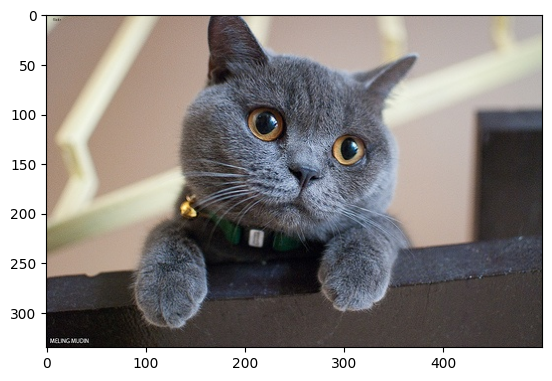

In [22]:
i = 3
im = Image.open(f"images/{df['filename'][i]}")
print(im.size)
print(df['label'][i])
plt.imshow(im)

### Load Data

In [23]:
from set_pytorch.classification.load_dataset import LoadDataset #เรียก packet modul function LoadDataset

In [24]:
!pwd

/content/kong_dataset_dogcat


In [25]:
custom_data = LoadDataset(img_path = 'images/',dataframe=df,x_col='filename',y_col='label') #ประกาศตัวแปร custom_data เก็บฟังก์ชัน LoadData แล้วส่ง parameter

In [26]:
len(custom_data) #จำนวน

3686

In [27]:
custom_data.get_dataframe() # เรียก modul อ่านไฟล์ datafram

filename  width  height  xmin  ymin  xmax  ymax label
0     Cats_Test3387.jpg    500     375   179    69   315   199   dog
1     Cats_Test3261.jpg    334     500   109    17   263   162   dog
2     Cats_Test1566.jpg    375     500   108   197   256   359   dog
3     Cats_Test2617.jpg    500     335   148     1   373   215   cat
4     Cats_Test3281.jpg    375     500     1    96   341   446   dog
...                 ...    ...     ...   ...   ...   ...   ...   ...
3681  Cats_Test1683.jpg    500     375   227    24   359   156   cat
3682  Cats_Test3256.jpg    500     333   213    53   311   162   dog
3683  Cats_Test1778.jpg    333     500    36    74   166   211   cat
3684   Cats_Test932.jpg    479     500    33    44   415   396   dog
3685   Cats_Test323.jpg    500     391    75    26   215   167   dog

[3686 rows x 8 columns]

In [28]:
custom_data.label_ #ตรวจสอบว่ามี label อะไรบ้าง

{'cat': 0, 'dog': 1}

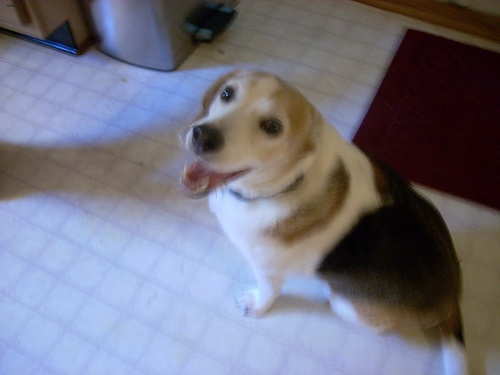

In [29]:
custom_data.get_value(0) #เรียกดู image ที่ 0

In [30]:
type(custom_data.get_value(0))

PIL.Image.Image

In [31]:
custom_data.get_value(0).size

(500, 375)

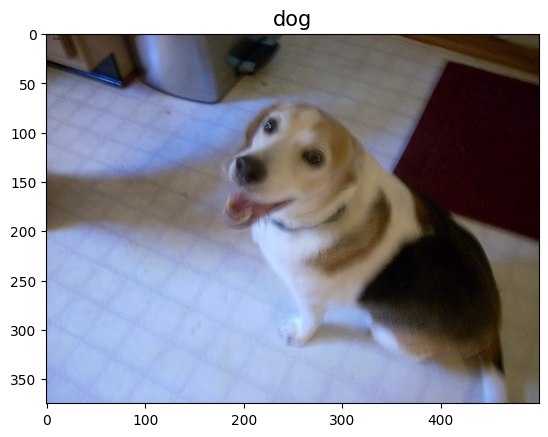

In [32]:
custom_data.plot_image(0)

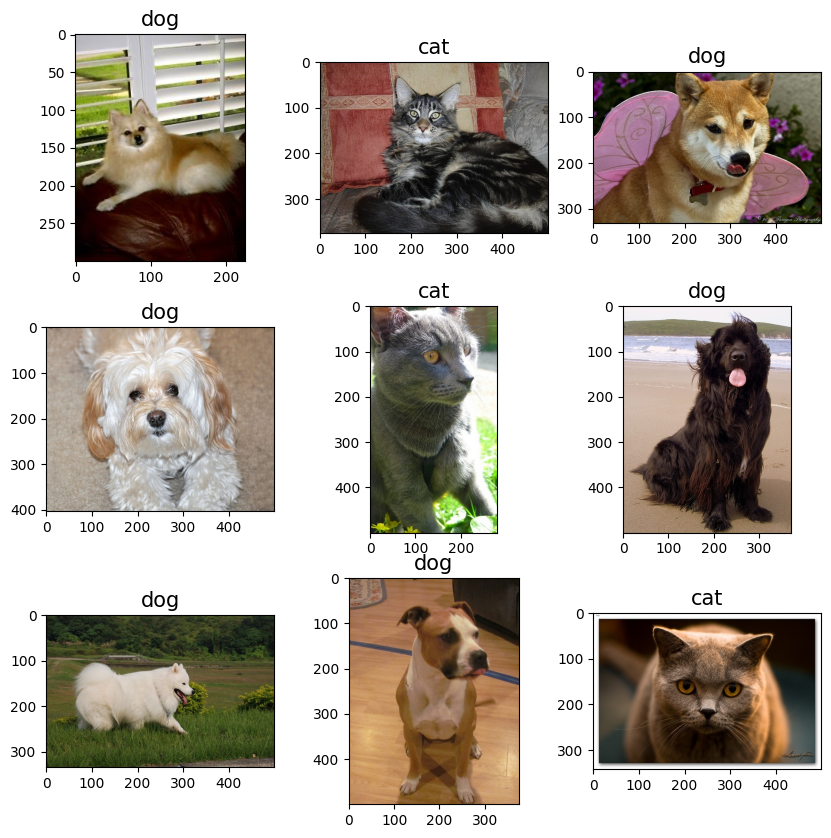

In [33]:
custom_data.multi_plot_image()

### Image Normalization

Resize และปรับค่า value ให้เป็นตัวเลข อยู่ในช่วง 0-255 ซึ่งต้องแปลงให้อยู่ในช่วง 0-1 ก่อน แล้วนำมา normalize ให้แต่ละค่ามีค่า mean เท่ากัน เพื่อไม่ให้เกิด bias สุดท้ายค่าจะอยู่ในช่วง [-1,1]

จุดประสงค์: Normalize เพื่อให้ AI ประมวลผลได้เร็วขึ้น

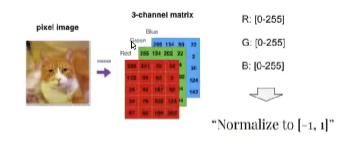

In [34]:
import torchvision.transforms as transforms

In [35]:
# แปลงรูปภาพให้อยู่ในรูปแบบเวกเตอร์
transform = transforms.Compose([transforms.Resize((224,224)),
  transforms.ToTensor(), #ค่าความสว่างจะเป็น 0-1
    transforms.Normalize(mean = (0.5,0.5,0.5),std=(0.5,0.5,0.5))]) #0.5 มาจากค่า mean ของ 0-1, 3 ค่าแทน r,g,b

# Note: ปรับสีให้ทุกภาพเท่ากันเพื่อให้ AI เรียนรู้ได้ไว

In [36]:
custom_data = LoadDataset(img_path='images/', dataframe=df ,x_col='filename' ,y_col='label' ,transform=transform)

In [37]:
type(custom_data.get_value(0)) #output type เปลี่ยนจาก PIL.Image เป็น torch.Tensor

torch.Tensor

In [38]:
custom_data.get_value(0) #output ค่าเปลี่ยนจากแสดงเป็น image เป็นช่วง [-1,1]

tensor([[[-0.2627, -0.2706, -0.2863,  ..., -0.4196, -0.4118, -0.4196],
         [-0.2627, -0.2706, -0.2627,  ..., -0.4118, -0.4196, -0.4196],
         [-0.2627, -0.2627, -0.2784,  ..., -0.4039, -0.4118, -0.4196],
         ...,
         [ 0.1451,  0.1451,  0.1529,  ..., -0.1294, -0.1137, -0.1137],
         [ 0.1451,  0.1529,  0.1451,  ..., -0.0980, -0.1059, -0.1137],
         [ 0.1451,  0.1373,  0.1294,  ..., -0.0745, -0.0980, -0.1137]],

        [[-0.4039, -0.4039, -0.4039,  ..., -0.5294, -0.5216, -0.5294],
         [-0.3804, -0.3804, -0.3647,  ..., -0.5137, -0.5137, -0.5216],
         [-0.3647, -0.3569, -0.3569,  ..., -0.4902, -0.4980, -0.5059],
         ...,
         [ 0.3098,  0.3098,  0.3255,  ..., -0.1373, -0.0980, -0.0902],
         [ 0.3020,  0.3176,  0.3255,  ..., -0.1059, -0.0980, -0.0902],
         [ 0.3020,  0.2941,  0.3098,  ..., -0.0824, -0.0824, -0.0902]],

        [[-0.4275, -0.4353, -0.4353,  ..., -0.6314, -0.6314, -0.6078],
         [-0.4118, -0.4275, -0.4039,  ..., -0

In [39]:
custom_data.get_value(0).shape

'''
Output
3 คือ ประกอบด้วย 3 chanel => r,g,b
224 => ขนาดค.กว้าง,ค.ยาว
'''

'\nOutput\n3 คือ ประกอบด้วย 3 chanel => r,g,b\n224 => ขนาดค.กว้าง,ค.ยาว\n'

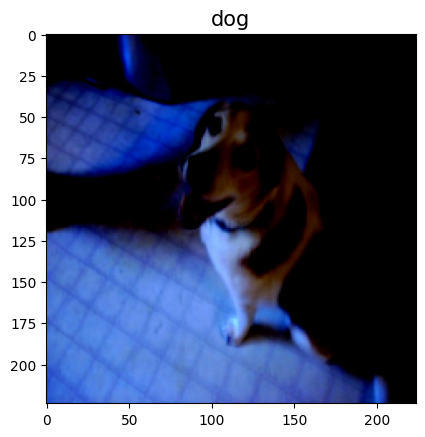

In [40]:
custom_data.plot_image(0) #output สีเปลี่ยน จากการ mormalize เปลี่ยนค่า mean,std ให้เป็น 0.5

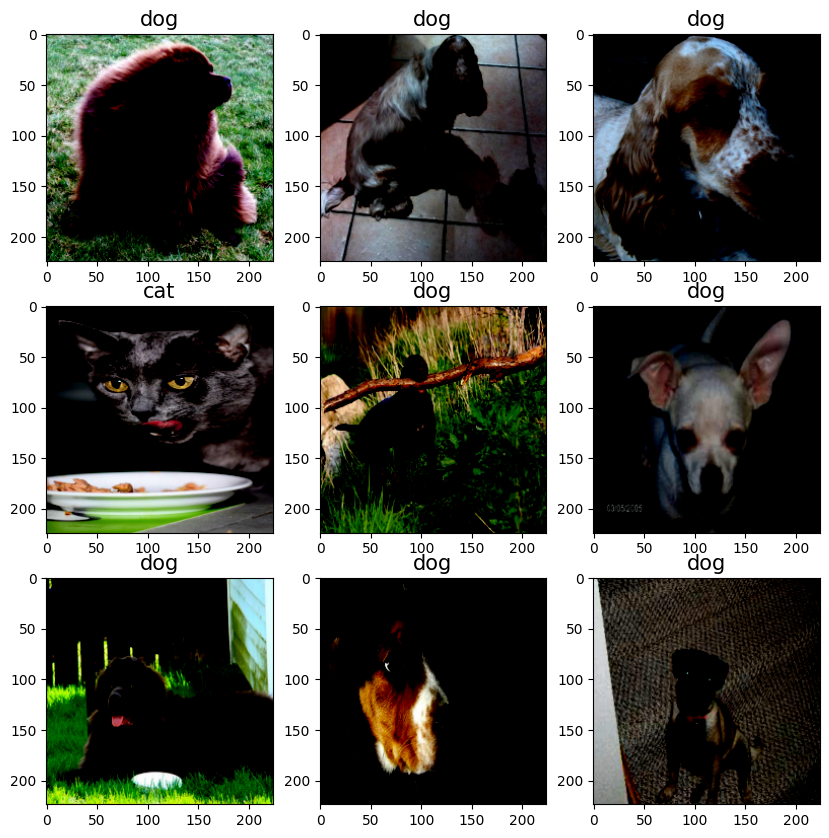

In [41]:
custom_data.multi_plot_image()

### Split Data

* training Dataset =>
ชุดข้อมูลที่ใช้เทรนโมเดล
* Validation Dataset => ชุดข้อมูลที่ใช้วัดประสิทธิภาพโมเดล จะเช็คในแต่ละรอบ (เปรียบเสมือน Quit)
* Test Dataset => ชุดข้อมูลที่ใช้ทดสอบ

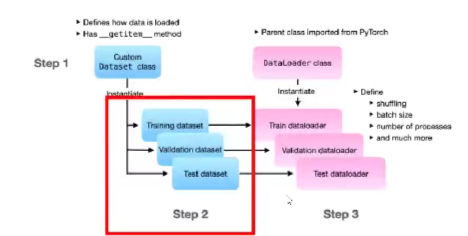

In [42]:
df

filename  width  height  xmin  ymin  xmax  ymax label
0     Cats_Test3387.jpg    500     375   179    69   315   199   dog
1     Cats_Test3261.jpg    334     500   109    17   263   162   dog
2     Cats_Test1566.jpg    375     500   108   197   256   359   dog
3     Cats_Test2617.jpg    500     335   148     1   373   215   cat
4     Cats_Test3281.jpg    375     500     1    96   341   446   dog
...                 ...    ...     ...   ...   ...   ...   ...   ...
3681  Cats_Test1683.jpg    500     375   227    24   359   156   cat
3682  Cats_Test3256.jpg    500     333   213    53   311   162   dog
3683  Cats_Test1778.jpg    333     500    36    74   166   211   cat
3684   Cats_Test932.jpg    479     500    33    44   415   396   dog
3685   Cats_Test323.jpg    500     391    75    26   215   167   dog

[3686 rows x 8 columns]

In [43]:
 #split train 70%, test 20%, validation 10%
train_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'train', split=(0.7,0.2,0.1))
test_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'test', split=(0.7,0.2,0.1))
val_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'valid', split=(0.7,0.2,0.1))

In [44]:
print(len(custom_data))
print(len(train_))
print(len(test_))
print(len(val_))

3686
2653
738
295


In [45]:
train_.get_dataframe()

filename  width  height  xmin  ymin  xmax  ymax label
0       Cats_Test17.jpg    500     375   160   176   456   357   dog
1      Cats_Test351.jpg    425     500   148   145   394   412   cat
2      Cats_Test663.jpg    500     367   189    36   286   142   cat
3     Cats_Test1419.jpg    276     400    38    63   108   147   cat
4     Cats_Test1506.jpg    500     281   157    46   304   181   dog
...                 ...    ...     ...   ...   ...   ...   ...   ...
2648  Cats_Test2047.jpg    375     500    49    35   317   320   cat
2649  Cats_Test2654.jpg    500     375    91     6   438   350   dog
2650  Cats_Test2600.jpg    300     183   168     1   281   151   dog
2651  Cats_Test1461.jpg    500     375   172     5   395   231   dog
2652  Cats_Test1734.jpg    230     300    43    47   176   135   dog

[2653 rows x 8 columns]

In [46]:
test_.get_dataframe()

filename  width  height  xmin  ymin  xmax  ymax label
0    Cats_Test1219.jpg    500     416   129    37   266   145   dog
1    Cats_Test3102.jpg    375     500   173   121   317   270   cat
2    Cats_Test1696.jpg    500     375   181    21   318   153   cat
3    Cats_Test2320.jpg    334     500    63    46   271   240   cat
4    Cats_Test1351.jpg    500     375   218    64   356   202   dog
..                 ...    ...     ...   ...   ...   ...   ...   ...
733  Cats_Test2420.jpg    500     330   181   126   299   239   dog
734  Cats_Test1451.jpg    500     442   297    80   433   230   cat
735  Cats_Test2186.jpg    500     375   162    70   363   218   cat
736  Cats_Test2028.jpg    412     480    85    14   261   195   cat
737   Cats_Test151.jpg    500     334   359    82   432   174   dog

[738 rows x 8 columns]

In [47]:
val_.get_dataframe()

filename  width  height  xmin  ymin  xmax  ymax label
0    Cats_Test1378.jpg    424     500    69   193   253   382   dog
1    Cats_Test3489.jpg    375     500    99    11   278   173   dog
2    Cats_Test1651.jpg    429     500    10    12   393   317   dog
3    Cats_Test1488.jpg    500     334   129    38   243   182   cat
4     Cats_Test715.jpg    400     500    64    28   263   241   cat
..                 ...    ...     ...   ...   ...   ...   ...   ...
290  Cats_Test2540.jpg    299     300    80    63   197   151   dog
291  Cats_Test1999.jpg    500     375    97     1   459   221   dog
292  Cats_Test2357.jpg    500     400   256   138   438   255   dog
293  Cats_Test3400.jpg    500     333   100     1   387   303   cat
294  Cats_Test2226.jpg    300     225    55    49   164   171   cat

[295 rows x 8 columns]

### Custom Dataset

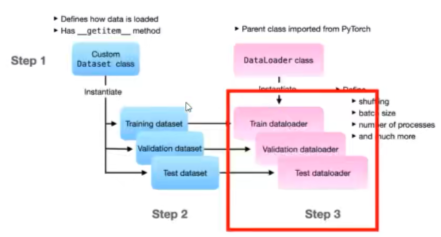

In [48]:
from torch.utils.data import DataLoader

In [49]:
train_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'train', split=(0.7,0.2,0.1))
train_loader = DataLoader(dataset=train_ , shuffle=True , batch_size=32)

val_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'valid', split=(0.7,0.2,0.1))
val_loader = DataLoader(dataset=val_ , shuffle=True , batch_size=32)

# Note:
# shuffle เป็นการสุ่มข้อมูลเพื่อไม่ให้เรียงกัน
# batch_size เป็นการใส่จำนวนข้อมูลที่ต้องการให้ AI เทรนทีเดียว (ลดเวลาในการเทรนข้อมูลทีละตัว) ส่วนใหญ่ใช้เป็น 2^n

In [50]:
print(len(train_))
print(len(val_))

2653
295


In [51]:
print(len(train_loader))
print(len(val_loader))

83
10


### Build Model

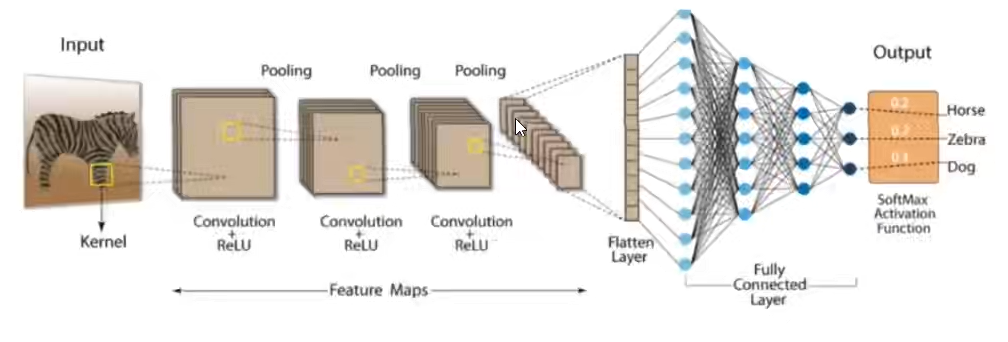

* CNN คือ การจำลองการเรียนรู้ของมนุษย์
  * ประกอบด้วย 2 layer คือ convolutional และ Nueral Network
  * จากภาพ Neural Network คือ Fully Connected layer และ convolutional คือ Feature Maps

#### Layers

##### Convolution Layer

ใช้ filter คัดกรองรูปภาพ
Ex.
* จากภาพ size 5x5
* ใช้ filter 3x3 โดย filter จะทำการสุ่ม weight ออกมา (0,1)
* ขนาดของรูปภาพหลังจากทำ convol จะเหลือ 3x3
* เลข 4 ที่ได้ คือ มาจากการใช้ kernel คัดกรองที่ filter แรก แล้วคูณกับรูปภาพ แล้วทำการ summation ออกมา

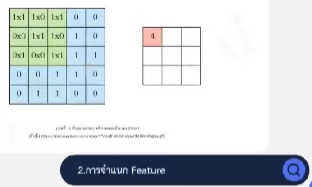

- Conv ใส่หลาย convol เพื่อให้ AI เรียนรู้ได้หลากหลายมากขึ้น ให้สามารถหา feature เด่นออกมาได้

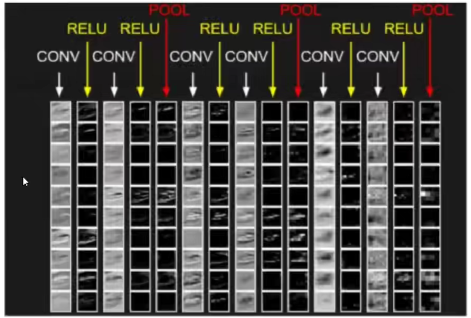

##### ReLu function

function ReLu ใช้เพื่อไม่ให้ค่าติดลบ โดยให้ค่าที่ติดลบเป็น 0

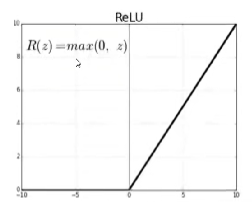

##### Max pooling
(pooling มีหลายแบบ แต่ยกตัวอย่าง Max Pooling)

เป็นชั้นของการหาค่ามากสุดหลังจากที่ convol โดยจะดึงค่ามากสุดของ kernel filter ออกมา
* ทำเพื่อดึงจุดเด่นของ feature ออกมา

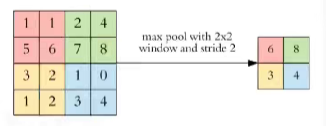

##### Flatten Layer

คือ การทำให้ตัวเลขที่มีหลาย dimention เป็น dimention เดียว (ทำให้ซ้อนกันอยู่ในระนาบเดียวกัน)

##### Softmax function

เป็น function ที่ตรวจสอบว่า AI แม่นยำกี่ %
- output เป็นค่า prob เท่ากับจำนวน class เช่น แมว,หมา เท่ากับ 2 คลาส

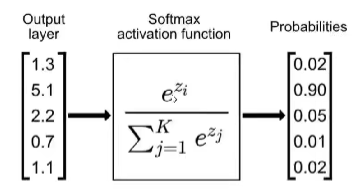

#### Build Model

In [52]:
from set_pytorch.classification.load_model import Model
from set_pytorch.classification.load_model import cal_shape

In [53]:
custom_data.label_

{'cat': 0, 'dog': 1}

In [54]:
import torch.nn as nn

'''
shape ขนาด
numChanels => r,g,b => 3 chanel
'''

class Cnn(nn.Module):
  def __init__(self,shape,numChanels,n_classes): #__init__ บอกว่าเรียกใช้ตัวแปรอะไรบ้างในคลาสนี้
    super().__init__()

    # ทำ convolution รอบที่ 1
    '''Convolution'''
    self.conv1 = nn.Conv2d(in_channels=numChanels,out_channels=32,kernel_size=(3,3)) #kernel_size คือขนาด filter 3x3, stride ถ้าไม่ใส่จะ set defual=1
    print(self.conv1)
    shape,out = cal_shape(shape,self.conv1) #cal_shape จะบอกว่าขนาดตอนทำ convol จะเป็นเท่าไหร่,out=out_chanels=32
    print(shape,out)
    '''ReLu'''
    self.relu1 = nn.ReLU()
    '''Max Pooling'''
    self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    shape,out = cal_shape(shape,self.conv1,self.pool1)
    print(shape,out)

    # ทำ convolution รอบที่ 2
    '''Convolution'''
    self.conv2 = nn.Conv2d(in_channels=out,out_channels=64,kernel_size=(3,3)) #kernel_size คือขนาด filter 3x3, stride ถ้าไม่ใส่จะ set defual=1
    print(self.conv2)
    shape,out = cal_shape(shape,self.conv2) #cal_shape จะบอกว่าขนาดหลังทำ convol จะเป็นเท่าไหร่,out=out_chanels=32
    print(shape,out)
    '''ReLu'''
    self.relu2 = nn.ReLU()
    '''Max Pooling'''
    self.pool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    shape,out = cal_shape(shape,self.conv2,self.pool2)
    print(shape,out)

    # ทำ convolution รอบที่ 3
    '''Convolution'''
    self.conv3 = nn.Conv2d(in_channels=out,out_channels=128,kernel_size=(3,3)) #kernel_size คือขนาด filter 3x3, stride ถ้าไม่ใส่จะ set defual=1
    print(self.conv3)
    shape,out = cal_shape(shape,self.conv3) #cal_shape จะบอกว่าขนาดตอนทำ convol จะเป็นเท่าไหร่,out=out_chanels=32
    print(shape,out)
    '''ReLu'''
    self.relu3 = nn.ReLU()
    '''Max Pooling'''
    self.pool3 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    shape,out = cal_shape(shape,self.conv3,self.pool3)
    print(shape,out)

    # ทำหลาย dimention ให้อยู่ใน dimention เดียว
    '''Flatten'''
    self.fc1 = nn.Linear(in_features=shape[0]*shape[1]*out, out_features=256)
    self.relu = nn.ReLU()
    self.out = self.fc1.out_features
    print(self.out)

    # ทำ softmax
    '''softmax'''
    self.fc2 = nn.Linear(in_features=self.out,out_features=n_classes)
    self.logSoftmax = nn.LogSoftmax(dim=1)

  def forward(self,x):
    x = self.pool1(self.relu1(self.conv1(x)))
    x = self.pool2(self.relu2(self.conv2(x)))
    x = self.pool3(self.relu3(self.conv3(x)))
    x = torch.flatten(x,1)
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    output = self.logSoftmax(x)
    return output

In [55]:
model = Model(Cnn,shape=224,numChannels=3,n_classes=custom_data.label_,device=device)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
(222, 222) 32
(111, 111) 32
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
(109, 109) 64
(54, 54) 64
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
(52, 52) 128
(26, 26) 128
256


In [56]:
model.summary()

Cnn(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=86528, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=2, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)

### Train Model

In [57]:
model.fit(train_loader,val_loader,epochs=7)

 14%|█▍        | 1/7 [07:16<43:39, 436.57s/it]

[INFO] EPOCH: 1/7
Train loss: 0.734345, Train accuracy: 0.6532
Val loss: 0.702665, Val accuracy: 0.6780



 29%|██▊       | 2/7 [14:53<37:23, 448.71s/it]

[INFO] EPOCH: 2/7
Train loss: 0.626608, Train accuracy: 0.6777
Val loss: 0.678722, Val accuracy: 0.6780



 43%|████▎     | 3/7 [22:28<30:06, 451.68s/it]

[INFO] EPOCH: 3/7
Train loss: 0.615329, Train accuracy: 0.6777
Val loss: 0.670728, Val accuracy: 0.6780



 57%|█████▋    | 4/7 [29:46<22:17, 445.97s/it]

[INFO] EPOCH: 4/7
Train loss: 0.589657, Train accuracy: 0.6879
Val loss: 0.689569, Val accuracy: 0.6881



 71%|███████▏  | 5/7 [36:39<14:28, 434.24s/it]

[INFO] EPOCH: 5/7
Train loss: 0.539281, Train accuracy: 0.7271
Val loss: 0.712503, Val accuracy: 0.6847



 86%|████████▌ | 6/7 [43:52<07:13, 433.76s/it]

[INFO] EPOCH: 6/7
Train loss: 0.471540, Train accuracy: 0.7735
Val loss: 0.691926, Val accuracy: 0.7186



100%|██████████| 7/7 [51:19<00:00, 439.95s/it]

[INFO] EPOCH: 7/7
Train loss: 0.391183, Train accuracy: 0.8259
Val loss: 0.750156, Val accuracy: 0.7186



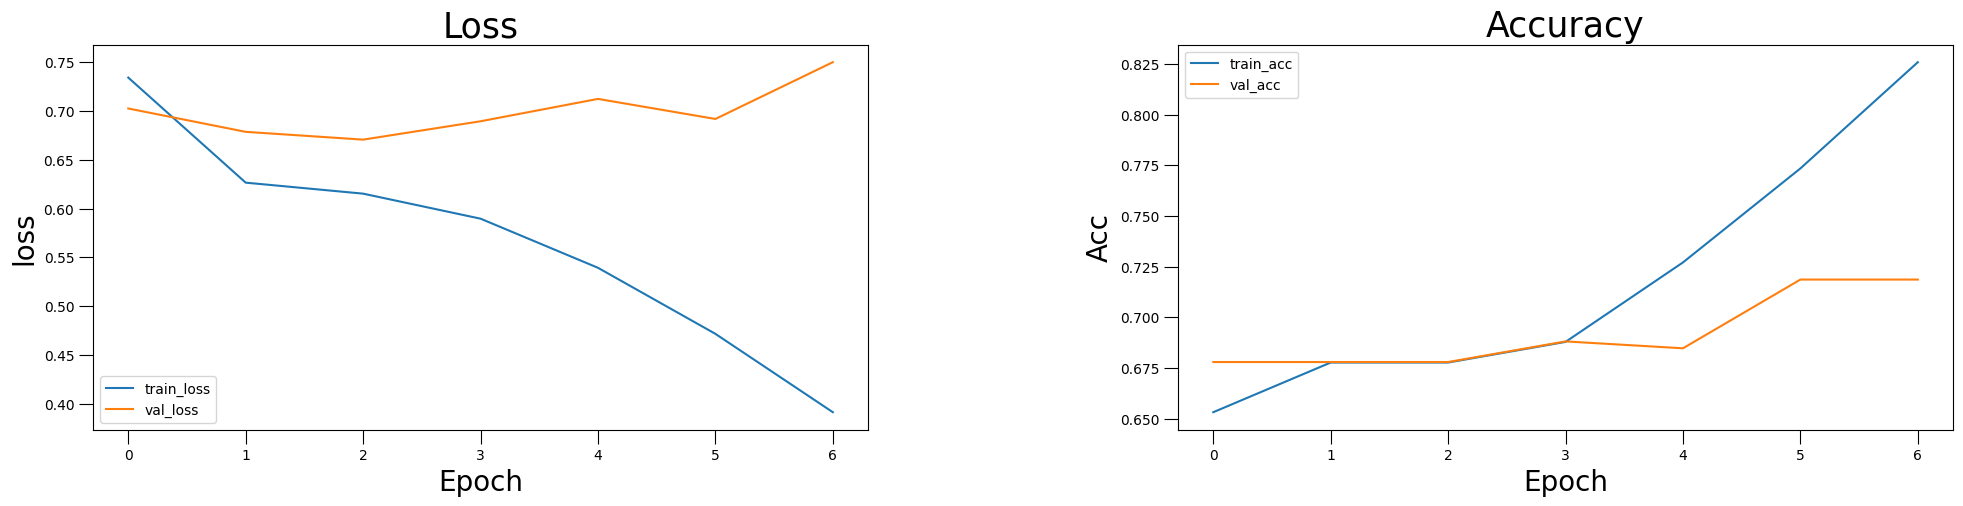

In [58]:
model.plot_ep()

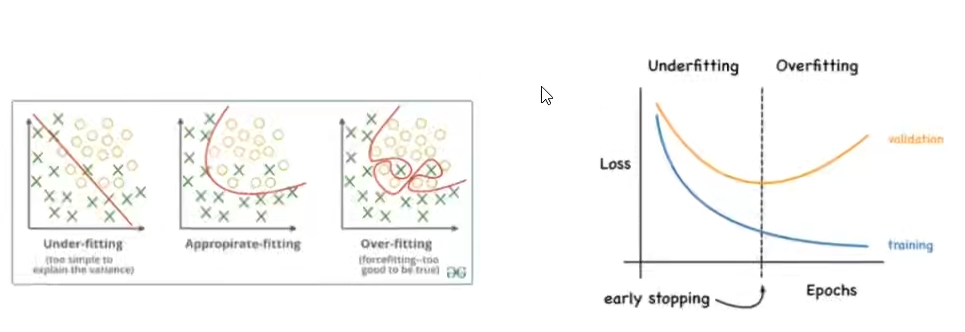

### Evaluation Test Data

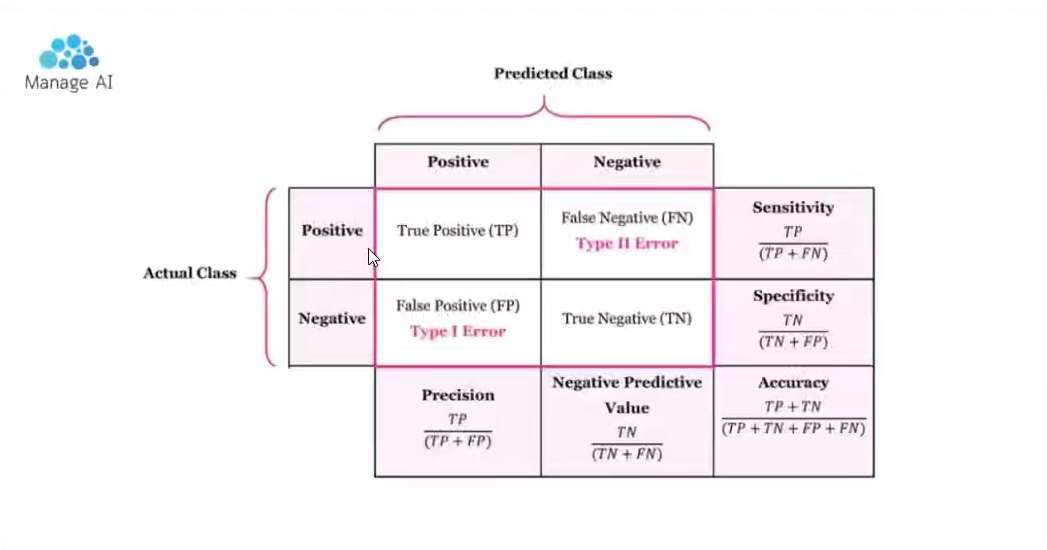

In [59]:
test_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform=transform , subset= 'test', split= (0.7,0.2,0.1))
test_loader = DataLoader(dataset=test_ , shuffle=False , batch_size=1)

In [60]:
print(len(test_))
print(len(test_loader))

738
738


In [61]:
y_test,y_pred = model.predict_testset(test_loader)

100%|██████████| 738/738 [00:44<00:00, 16.46it/s]


In [62]:
print(len(y_test))
print(len(y_pred))

738
738


In [63]:
y_test[:5]

[array([1]), array([0]), array([0]), array([0]), array([1])]

In [64]:
y_pred[:5]

[array([1]), array([0]), array([0]), array([0]), array([1])]

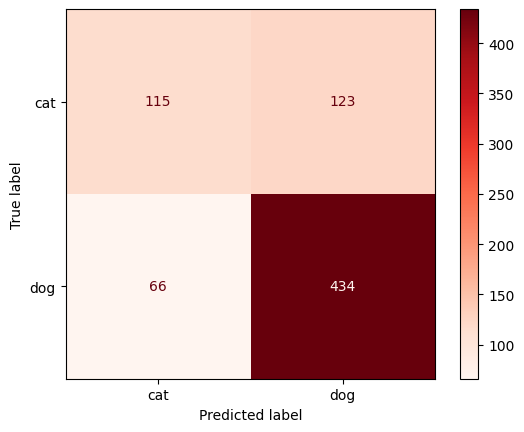

In [65]:
model.Confusion_Matrix(y_test,y_pred)

In [66]:
model.Classification_Report(y_test,y_pred)

              precision    recall  f1-score   support

         cat       0.64      0.48      0.55       238
         dog       0.78      0.87      0.82       500

    accuracy                           0.74       738
   macro avg       0.71      0.68      0.69       738
weighted avg       0.73      0.74      0.73       738



### Techniques to Prevent Overfitting

#### Image Augmentation

เป็นการเพิ่ม dimention เช่น นำภาพมาเพิ่มจำนวนด้วยการ flip,zoom เป็นต้น

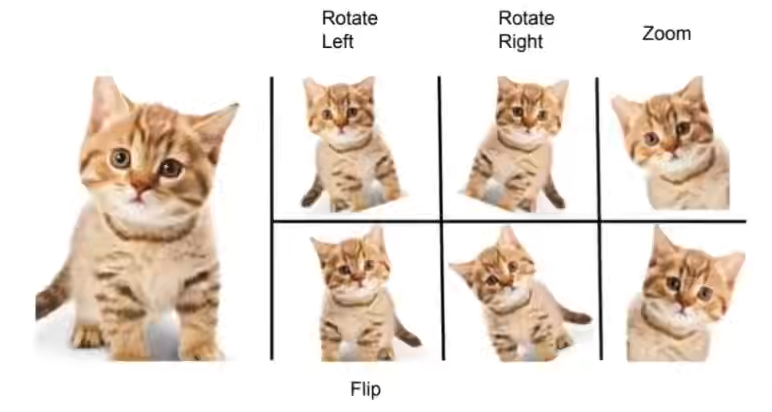

In [67]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
  transforms.ToTensor(),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.RandomRotation(30),
  transforms.Normalize(mean = (0.5,0.5,0.5),std=(0.5,0.5,0.5))
  ])

transform_val = transforms.Compose([transforms.Resize((224,224)),
  transforms.ToTensor(),
    transforms.Normalize(mean = (0.5,0.5,0.5),std=(0.5,0.5,0.5))])

In [68]:
train_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'train', split=(0.7,0.2,0.1))
train_loader = DataLoader(dataset=train_ , shuffle=True , batch_size=32)

val_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'valid', split=(0.7,0.2,0.1))
val_loader = DataLoader(dataset=val_ , shuffle=True , batch_size=32)

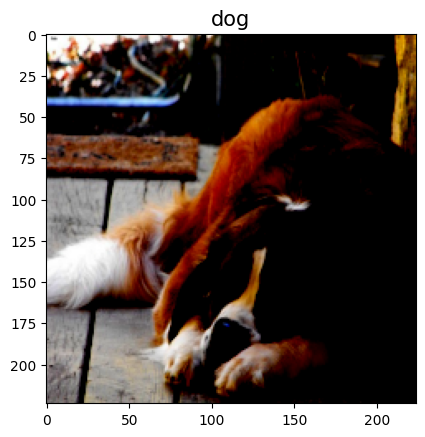

In [69]:
i = 0
train_.plot_image(i)

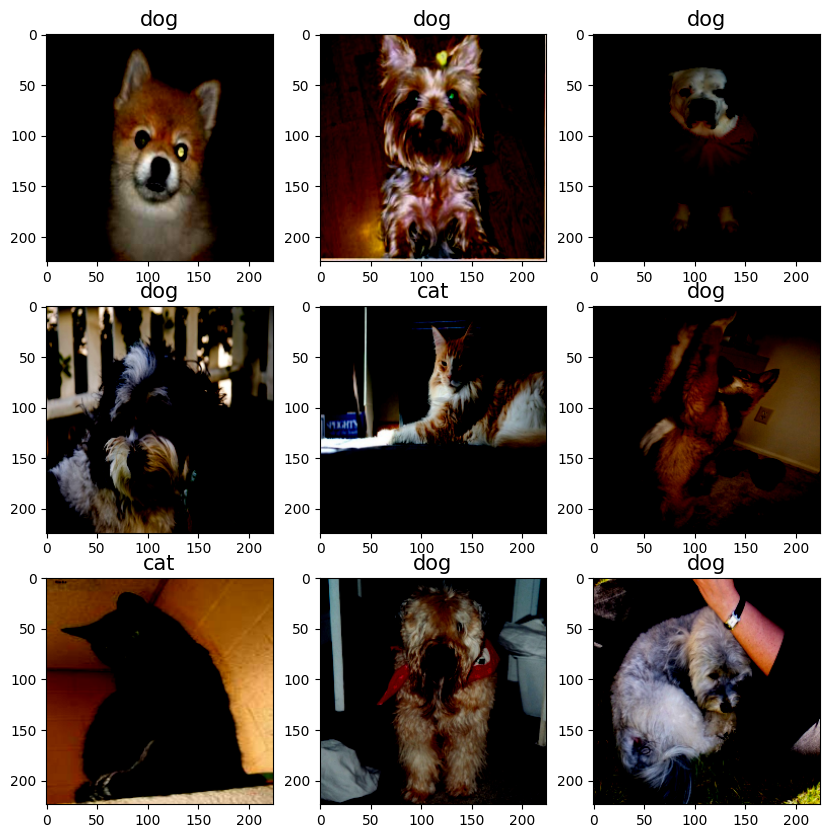

In [70]:
train_.multi_plot_image()

#### Drop out

ลบบาง node ออกไป

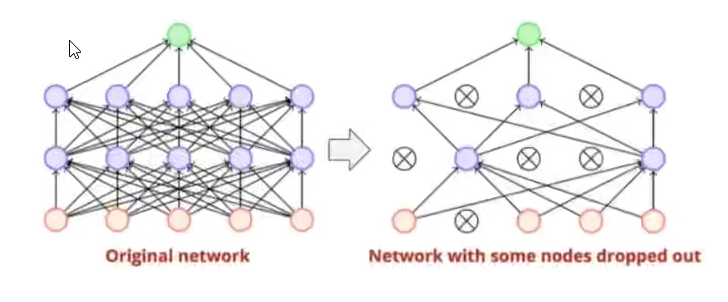

#### Tranfer Learning

นำโมเดลสำเร็จรูปที่มีอยู่แล้วมาเทรนต่อ เช่น Vgg6 (https://pytorch.org/vision/stable/models.html)

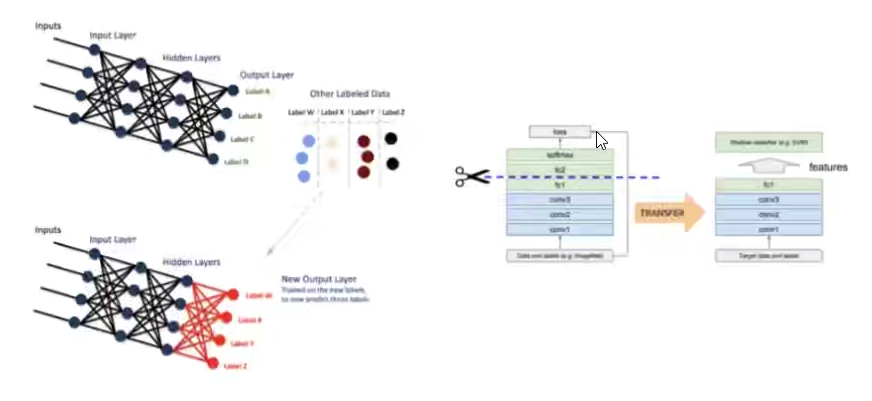

Vgg6

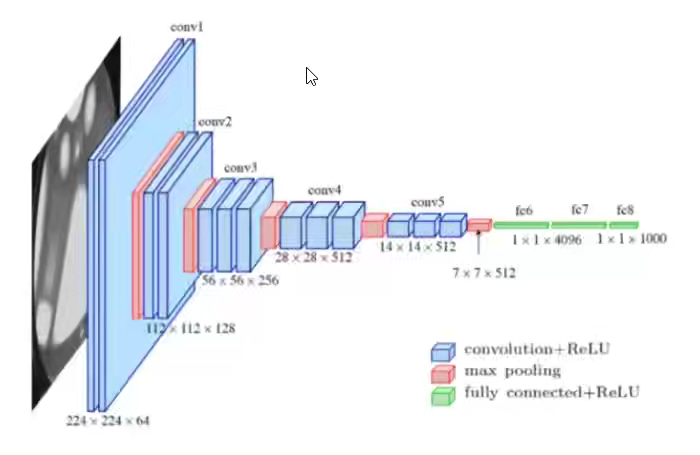

In [71]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
  transforms.ToTensor(),
  transforms.RandomResizedCrop(224,scale=(0.5,1.0)),
  transforms.Normalize(mean = (0.5,0.5,0.5),std=(0.5,0.5,0.5)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.RandomRotation(15),
  ])

transform_val = transforms.Compose([transforms.Resize((224,224)),
  transforms.ToTensor(),
    transforms.Normalize(mean = (0.5,0.5,0.5),std=(0.5,0.5,0.5))])

In [72]:
train_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'train', split=(0.7,0.2,0.1))
train_loader = DataLoader(dataset=train_ , shuffle=True , batch_size=32)

val_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform= transform, subset= 'valid', split=(0.7,0.2,0.1))
val_loader = DataLoader(dataset=val_ , shuffle=True , batch_size=32)

In [73]:
from torchvision.models import vgg16

In [74]:
vgg16

<function torchvision.models.vgg.vgg16(*, weights: Optional[torchvision.models.vgg.VGG16_Weights] = None, progress: bool = True, **kwargs: Any) -> torchvision.models.vgg.VGG>

In [75]:
model_v = Model(vgg16, shape=224, numChannels=3, n_classes=custom_data.label_, device=device,tranfer_=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 53.7MB/s]


In [76]:
model_v.summary()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [77]:
model_v.fit(train_loader,val_loader,epochs=5)

 20%|██        | 1/5 [34:02<2:16:11, 2042.95s/it]

[INFO] EPOCH: 1/5
Train loss: 0.078302, Train accuracy: 0.9706
Val loss: 0.032362, Val accuracy: 0.9898



 40%|████      | 2/5 [1:07:54<1:41:48, 2036.06s/it]

[INFO] EPOCH: 2/5
Train loss: 0.029711, Train accuracy: 0.9891
Val loss: 0.030192, Val accuracy: 0.9898



 60%|██████    | 3/5 [1:41:41<1:07:44, 2032.24s/it]

[INFO] EPOCH: 3/5
Train loss: 0.017782, Train accuracy: 0.9955
Val loss: 0.031790, Val accuracy: 0.9898



 80%|████████  | 4/5 [2:15:34<33:52, 2032.21s/it]  

[INFO] EPOCH: 4/5
Train loss: 0.017675, Train accuracy: 0.9951
Val loss: 0.038464, Val accuracy: 0.9898



100%|██████████| 5/5 [2:49:15<00:00, 2031.11s/it]

[INFO] EPOCH: 5/5
Train loss: 0.016732, Train accuracy: 0.9955
Val loss: 0.034157, Val accuracy: 0.9898



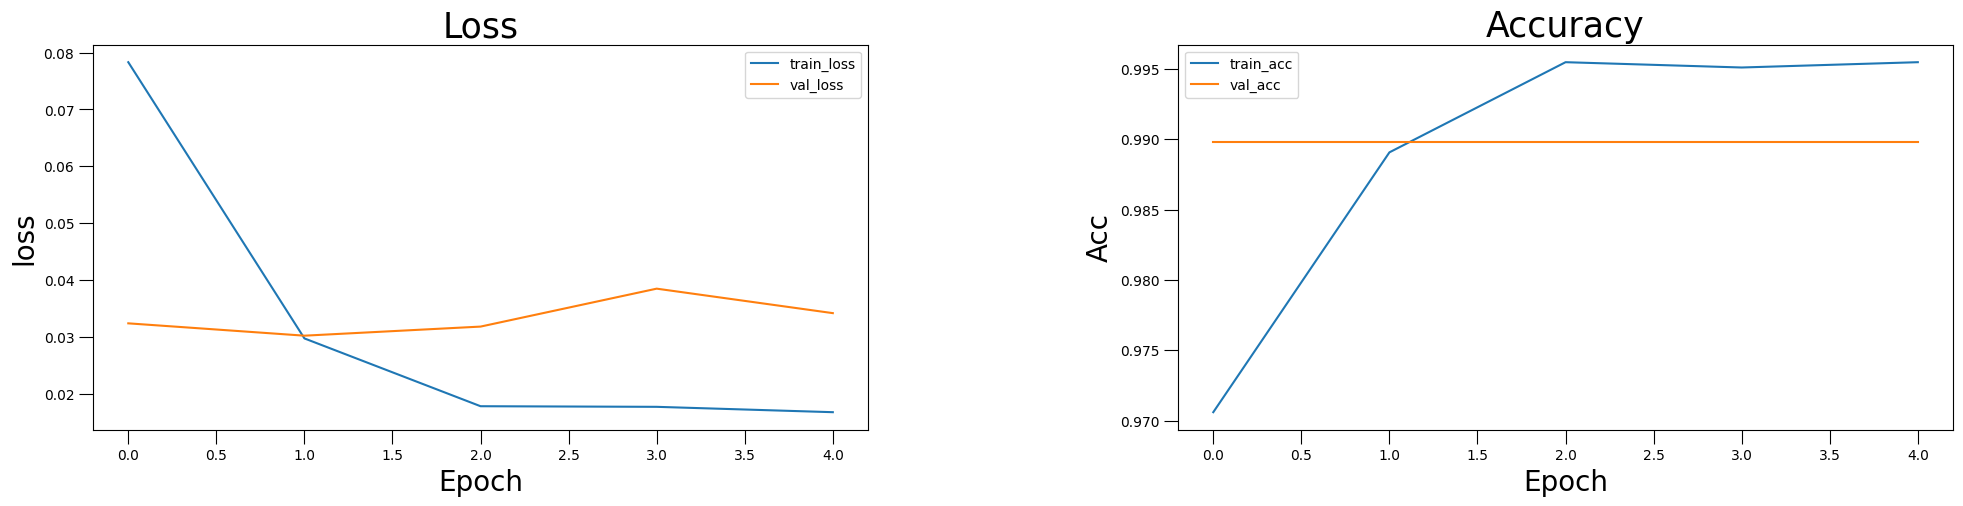

In [78]:
model_v.plot_ep()

In [79]:
transform = transforms.Compose([transforms.Resize((224,224)),
  transforms.ToTensor(), #ค่าความสว่างจะเป็น 0-1
    transforms.Normalize(mean = (0.5,0.5,0.5),std=(0.5,0.5,0.5))]) #0.5 มาจากค่า mean ของ 0-1, 3 ค่าแทน r,g,b

test_ = LoadDataset(img_path= 'images/', dataframe= df, x_col= 'filename', y_col= 'label', transform=transform , subset= 'test', split= (0.7,0.2,0.1))
test_loader = DataLoader(dataset=test_ , shuffle=False , batch_size=1)

In [80]:
y_test,y_pred = model_v.predict_testset(test_loader)

100%|██████████| 738/738 [08:15<00:00,  1.49it/s]


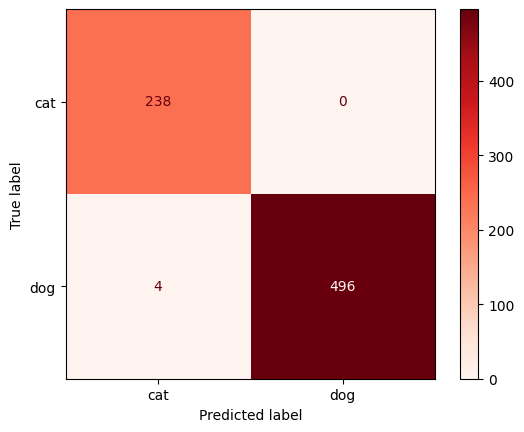

In [81]:
model.Confusion_Matrix(y_test,y_pred)

In [82]:
model.Classification_Report(y_test,y_pred)

              precision    recall  f1-score   support

         cat       0.98      1.00      0.99       238
         dog       1.00      0.99      1.00       500

    accuracy                           0.99       738
   macro avg       0.99      1.00      0.99       738
weighted avg       0.99      0.99      0.99       738



In [83]:
test_.get_value(0)

tensor([[[-0.4118, -0.4431, -0.4353,  ..., -0.7961, -0.7961, -0.8039],
         [-0.5137, -0.5216, -0.4588,  ..., -0.8196, -0.8118, -0.8118],
         [-0.5137, -0.4980, -0.4902,  ..., -0.6941, -0.7490, -0.8275],
         ...,
         [-0.9137, -0.8902, -0.8667,  ..., -0.7961, -0.7882, -0.7098],
         [-0.8980, -0.8824, -0.8588,  ..., -0.7961, -0.7804, -0.7098],
         [-0.8510, -0.8588, -0.8510,  ..., -0.7020, -0.7412, -0.7647]],

        [[-0.3725, -0.3725, -0.3961,  ..., -0.7725, -0.7804, -0.7804],
         [-0.3490, -0.3725, -0.3725,  ..., -0.8275, -0.8196, -0.7725],
         [-0.4196, -0.4118, -0.4196,  ..., -0.7098, -0.7412, -0.7569],
         ...,
         [-0.9294, -0.8980, -0.8902,  ..., -0.7020, -0.7333, -0.7333],
         [-0.9137, -0.8902, -0.9059,  ..., -0.7333, -0.7569, -0.7569],
         [-0.9451, -0.9216, -0.9294,  ..., -0.7255, -0.7647, -0.7804]],

        [[-0.5529, -0.5608, -0.5608,  ..., -0.9373, -0.9294, -0.9216],
         [-0.5686, -0.6235, -0.5686,  ..., -0

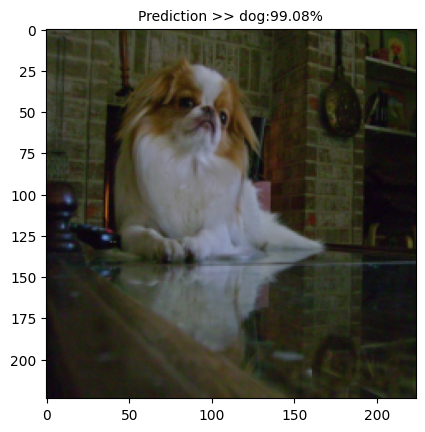

In [84]:
i = 0
model_v.predict_image(test_.get_value(i))

### Other Usecase

In [85]:
transform = transforms.Compose([transforms.Resize((224,224)),
  transforms.ToTensor(), #ค่าความสว่างจะเป็น 0-1
    transforms.Normalize(mean = (0.5,0.5,0.5),std=(0.5,0.5,0.5))])

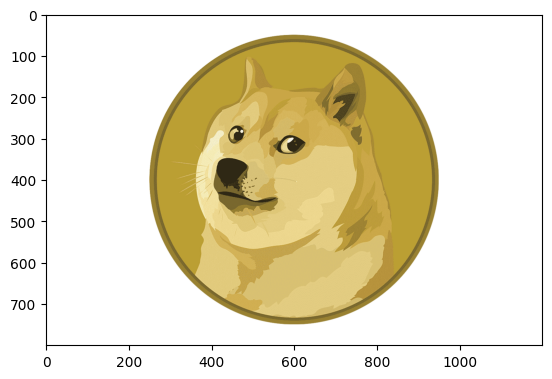

In [86]:
image = Image.open('dogecoin-og-logo.png').convert('RGB')
plt.imshow(image)

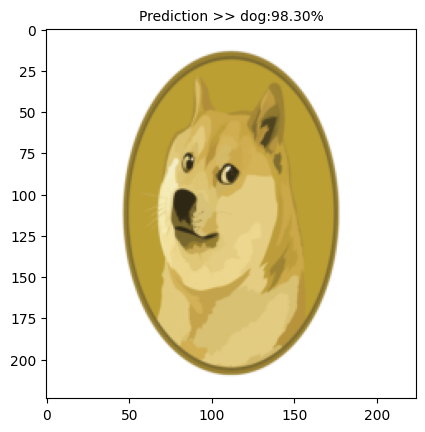

In [87]:
image = Image.open('dogecoin-og-logo.png').convert('RGB')
image = transform(image)
model_v.predict_image(image)

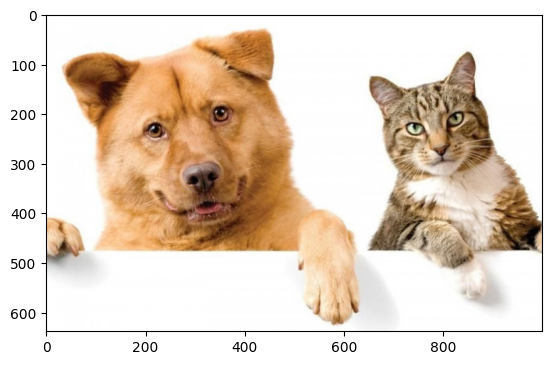

In [88]:
image = Image.open('16E2CB2CC41B4CB980FC4480DC146122_1000.jpg')
plt.imshow(image)

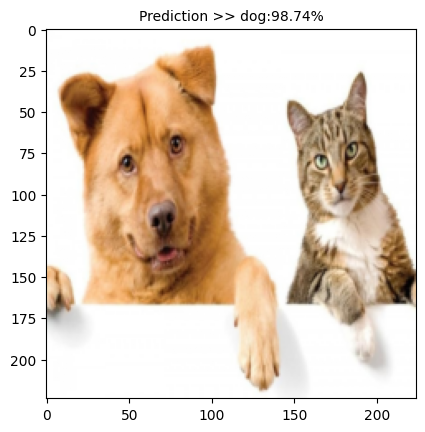

In [89]:
image = Image.open('16E2CB2CC41B4CB980FC4480DC146122_1000.jpg')
image = transform(image)
model_v.predict_image(image)